**Goal**
Build Logistic Regression model whether user has diabetes or not. Model would be built using sklearn.linear_model library & served in web using streamlit.

**Overview**

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage 
(subgroup of Native Americans), and are females of ages 21 and above.

Objective is to predict whether user is diabetic or not based on certain diagnostic measurements.

Let's understand the dataset, it has 8 prediction variables & 1 target/dependent variable "Outcome" which is encoded as 0-No diabetes & 1-With diabetes.
Other columns in the dataset are explained below


**Understanding the variables in the dataset**

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)2)

DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

Age: Age (years)

Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

**Exploring the dataset**

We will explore the dataset using Jupyter Lab Notebook & pandas library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

**Importing the dataset** 

We will import the dataset pima-indians-diabetes.data.csv from GitHub into Pandas dataframe & show first few records from the dataframe.

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetesDF = pd.read_csv(url, names=names)
diabetesDF.head(2)

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0

In [4]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data Exploration**

Let us now explore our dataset to get a feel of what it looks like and get some understanding about it.

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in a dataframe.
    Any na values are automatically excluded.
    Any non-numeric data type column in the dataframe will be ignored. So encode all categorical values into numerical values before fining correlation between attributes in the dataset.
    
There are 3 types of correlation methods dataframe.corr() support:
    Pearson
    Kendall
    Spearman
    
Let's detail them in another blog for now don't use just df.corr(), specifically call which method you are calling to ensure its not fully blackbox.
    

Seaborn lets us visually see correlation between variables attributes using heatmap.
Picture tells better story than numbers:)

In [5]:
corr = diabetesDF.corr(method ='pearson')
print(corr)

           preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
preg   0.544341  0.221898  
plas   0.263514  0.466581  
pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.0335

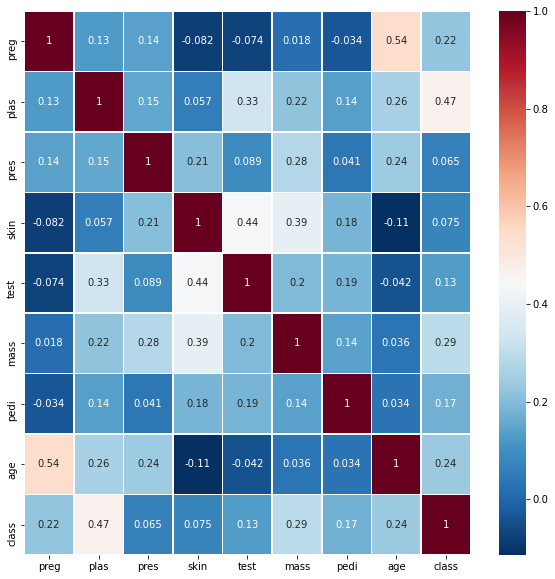

In [6]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,annot=True,cmap='RdBu_r',linewidths=0.5,ax=ax)

In the above chart, if the box is redder it has more correlation to people having diabetes.

From the above chart, we could get Blood Glucose level is important contributing factor for diabetes in pima women followed by BMI,age & no of pregnancies. Pima women get gestational diabetes(diabetes during pregnancies) ,what could be the contributing factor? getting pregnant at older age seems to contribute more per data.

Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

From the above figure, we can draw the following conclusions.

    1) diabetes pedigree function , BMI, pregnancies have significant influence on the model, specially diabetes pedigree function , BMI, pregnancies. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!
    2) Blood pressure has a negative influence on the prediction.
    3) If you have more pregnancies, it can possibly result in diabetes.

**Let’s also look at how many people in the dataset are diabetic and not.**

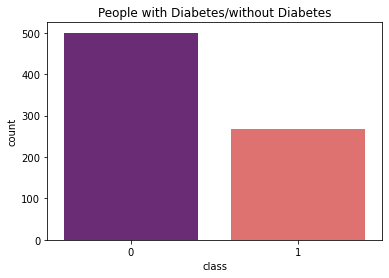

In [8]:
sns.countplot(x = 'class', data = diabetesDF, palette = 'magma')
plt.title('People with Diabetes/without Diabetes')
plt.show()

**Average age of people having diabetes vs without diabetes**

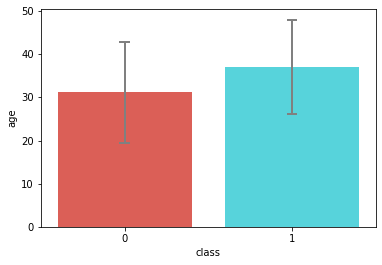

In [10]:
sns.barplot(x = 'class', y = 'age',data = diabetesDF,
            palette = 'hls',
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

**To understand similarities as well as differences in the dataset between diabetic and non-diabetic patients**

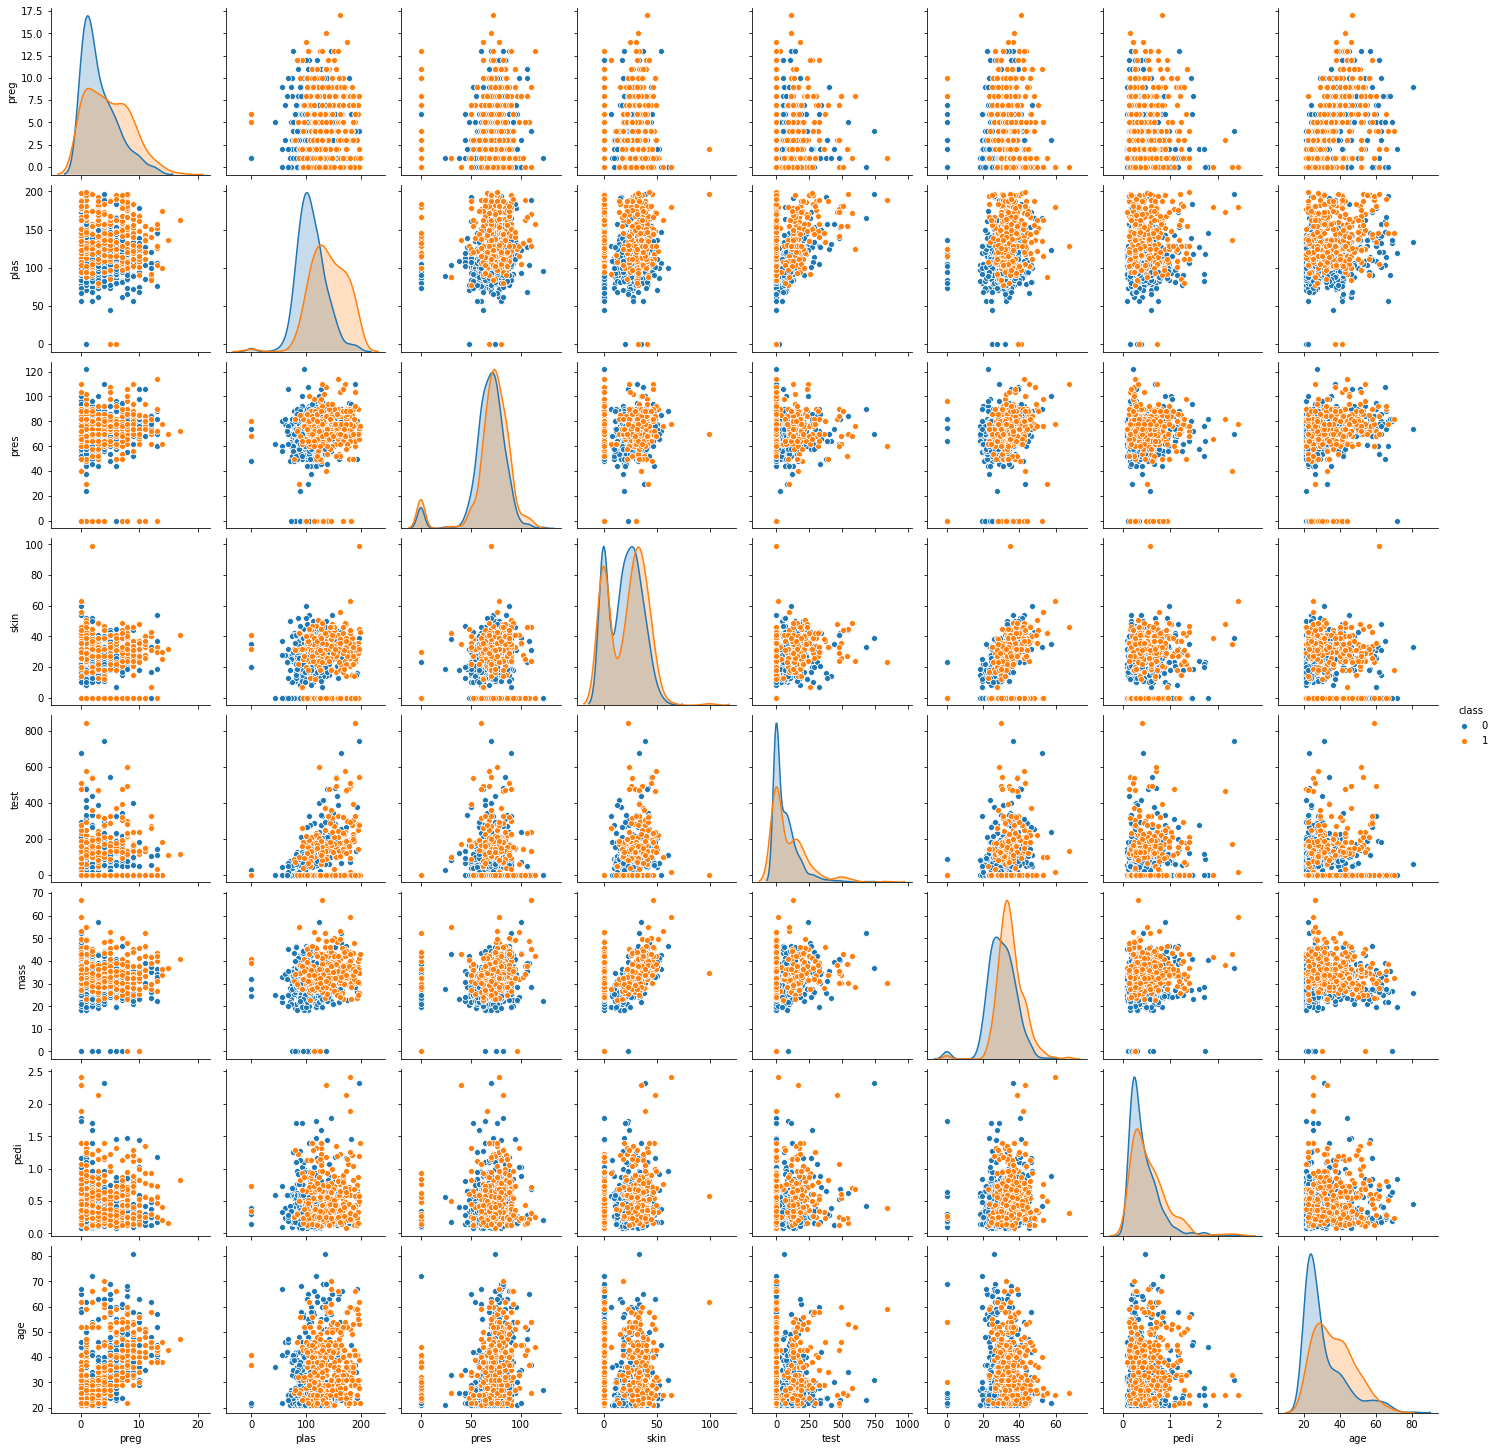

In [11]:
sns.pairplot(diabetesDF,hue='class')

**Dataset Preparation**

When using machine learning algorithms to build model we should always split our data into a training set and test set to avoid overfitting.
The data set consists of record of 767 users in total. 70% of it we would use it for testing & rest 30% for training the model.

In [12]:
# Split dataset into training set and test set
array = diabetesDF.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.50
seed = 105
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [13]:
# Scale the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Apply dimensionality reduction

pca = PCA(n_components=3)
model = pca.fit(X_train_scaled)
X_train_dim_red = model.transform(X_train_scaled)

#Test data
X_test_dim_red = pca.transform(X_test_scaled)
model.explained_variance_ratio_

array([0.27183092, 0.21871604, 0.12948361])

**Extracting the features of the PCA output**

In [24]:
n_pcs= model.components_.shape[0]

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age',]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
df

0     1
0  PC0  test
1  PC1  preg
2  PC2  pedi

In [30]:
#Creating the model
diabetesCheck = LogisticRegression()
diabetesCheck.fit(X_train_dim_red, Y_train)
accuracy = diabetesCheck.score(X_test_dim_red, Y_test)
print(f' Accuracy of the model : {round(accuracy * 100,2)} %')

 Accuracy of the model : 73.18 %


**Saving the Model  to disk**

In [32]:
filename = 'diab_web.sav'
pickle_out = open(filename, "wb") 
joblib.dump(diabetesCheck, pickle_out) 
pickle_out.close()

**Load from Pickle to check if model is dumped correctly**

In [34]:
# load the model from disk

diabetesLoadedModel = joblib.load(open(filename, 'rb'))
accuracyModel = diabetesLoadedModel.score(X_test_dim_red, Y_test)
print("accuracy = ",round(accuracyModel * 100,2),"%",diabetesLoadedModel)

accuracy =  73.18 % LogisticRegression()
